In [1]:
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
%pylab inline
import numpy as np
import os 
import mdtraj as md 
sns.set_style("whitegrid")
sns.set_context("talk",1.3)

Populating the interactive namespace from numpy and matplotlib


In [2]:
from msmbuilder.utils import load,dump

In [3]:
from kinase_msm.data_loader import load_yaml_file
from msmbuilder.utils import verboseload
from kinase_msm.mdl_analysis import ProteinSeries,Protein

In [24]:
yaml_loc = "../models/sparse_contact_mdl_0.00025_15_tics//project.yaml"

ser = ProteinSeries(yaml_loc,"../models/")
prj = Protein(ser,"rcsb_mdl")
prjh = Protein(ser, "rcsb_hmdl")


loading "../models/sparse_contact_mdl_0.00025_15_tics/kmeans_mdl.pkl"...
loading "../models/sparse_contact_mdl_0.00025_15_tics/tica_mdl.pkl"...
loading "../models/sparse_contact_mdl_0.00025_15_tics/rcsb_mdl/msm_mdl.pkl"...
loading "../models/sparse_contact_mdl_0.00025_15_tics/rcsb_mdl/tica_data.pkl"...
loading "../models/sparse_contact_mdl_0.00025_15_tics/rcsb_mdl/assignments.pkl"...
loading "../models/sparse_contact_mdl_0.00025_15_tics/rcsb_mdl/fixed_assignments.pkl"...
loading "../models/sparse_contact_mdl_0.00025_15_tics/rcsb_hmdl/msm_mdl.pkl"...
loading "../models/sparse_contact_mdl_0.00025_15_tics/rcsb_hmdl/tica_data.pkl"...
loading "../models/sparse_contact_mdl_0.00025_15_tics/rcsb_hmdl/assignments.pkl"...
loading "../models/sparse_contact_mdl_0.00025_15_tics/rcsb_hmdl/fixed_assignments.pkl"...


In [25]:
prj.tica_mdl

SparseTICA(epsilon=1e-06, kinetic_mapping=False, lag_time=2000, maxiter=10000,
      n_components=15, rho=0.00025, shrinkage=None, tolerance=1e-06,
      verbose=False)

[]

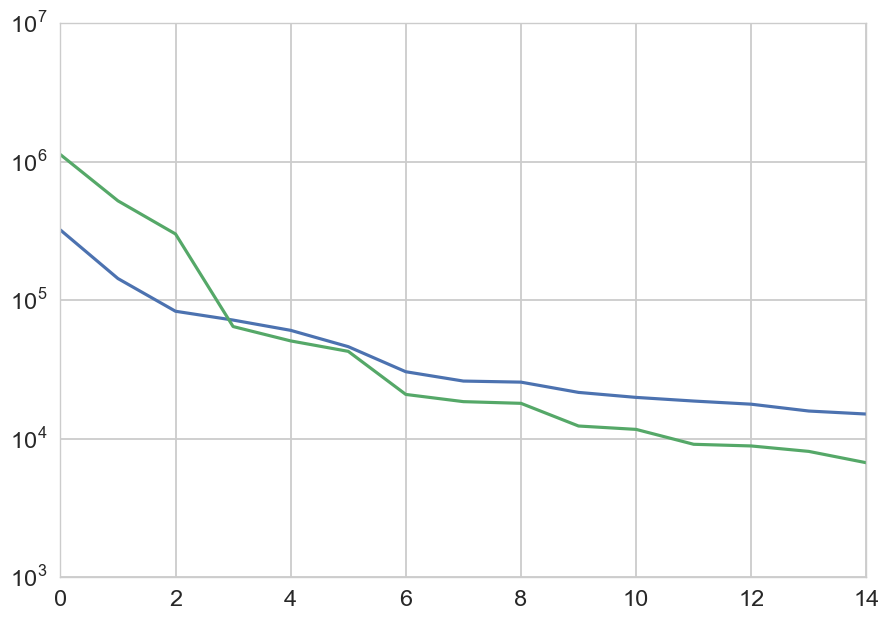

In [26]:
#prj.tica_mdl.n_components = 10
plot(prj.tica_mdl.timescales_)
plot(prjh.msm.timescales_[:prj.tica_mdl.n_components])
semilogy()

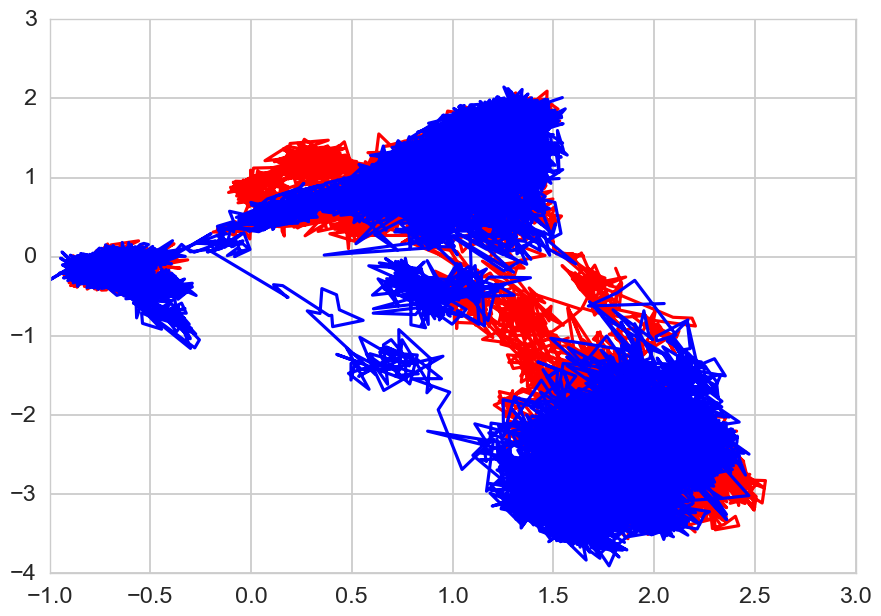

In [27]:
for i in prj.tica_data.keys():
    plot(prj.tica_data[i][::50,0], prj.tica_data[i][::50,1],c='r')
for i in prjh.tica_data.keys():
    plot(prjh.tica_data[i][::50,0], prjh.tica_data[i][::50,1],c='b')

In [28]:
from kinase_msm.tica_utils import max_movement

PROJ9151_10_22.jl
PROJ9151_8_0.jl
PROJ9145_10_0.jl
PROJ9151_7_5.jl
PROJ9151_10_2.jl
PROJ9151_2_8.jl
PROJ9151_9_3.jl
PROJ9145_10_2.jl
PROJ9151_9_1.jl
PROJ9151_4_15.jl


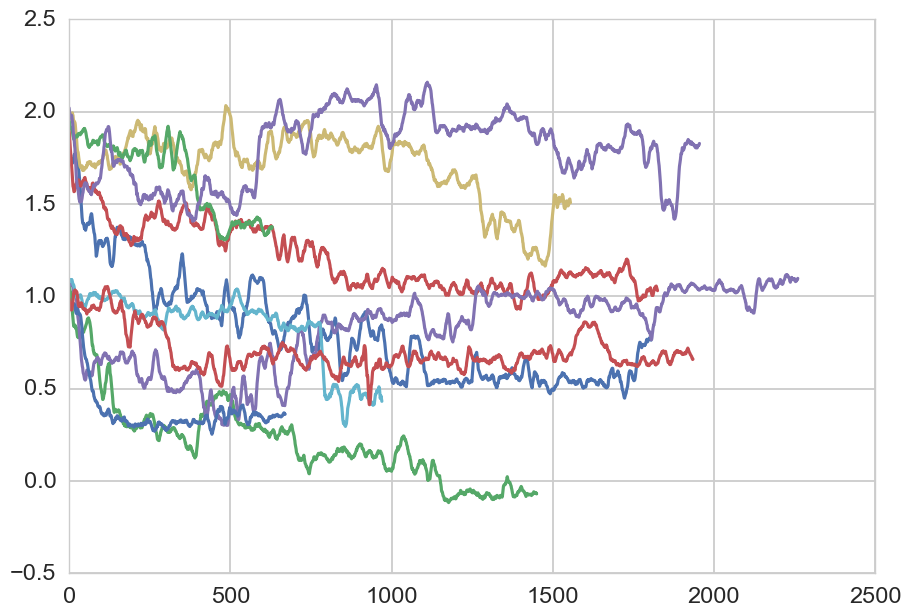

In [31]:
for i in max_movement(prj.tica_data,0,10):
    print(i)
    plot(movavg(prj.tica_data[i][::5,0],15))

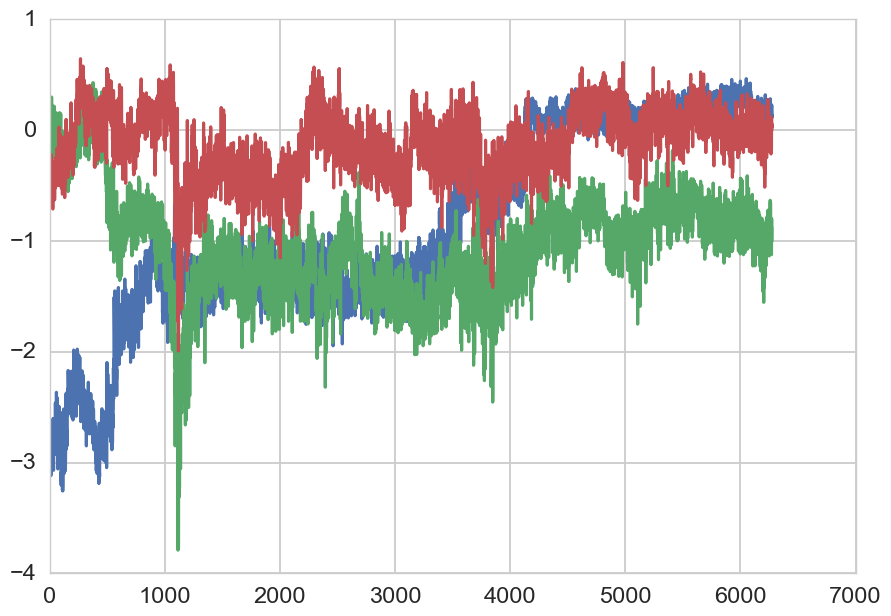

In [32]:
plot(prjh.tica_data["PROJ9152_4_5.jl"][:,1:4])

In [33]:
from kinase_msm.plotting_utils import two_dim_free_energy_kde, global_tic_boundaries,scipy_kde
from scipy.stats import gaussian_kde


In [34]:
limits=global_tic_boundaries([prj,prjh],[0,1],100)

In [35]:
X1,Y1,j1 = two_dim_free_energy_kde(prj,limits,
                                   bw_method="scott",n_samples=20000)
X2,Y2,j2 = two_dim_free_energy_kde(prjh,limits,
                                   bw_method="scott",n_samples=20000)

In [36]:
offset = j1.min()

In [37]:
j1 -= offset
j2 -= offset

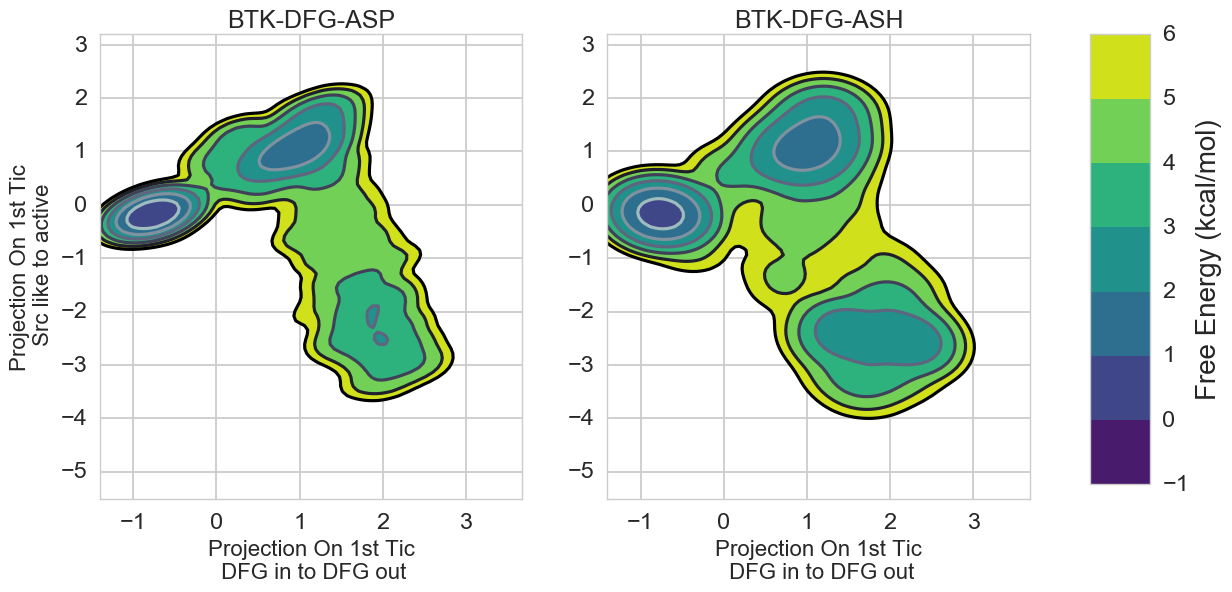

In [85]:
lvls=np.linspace(-1,6,8)
fig=figure(figsize=(12,6))
subplot(1,2,1)
contour(X1,Y1,j1,cmap='bone_r',levels=lvls)
contourf(X1,Y1,j1,cmap='viridis',levels=lvls)
xlabel("Projection On 1st Tic\n DFG in to DFG out",size=16)
ylabel("Projection On 1st Tic\n Src like to active", size=16)
title("BTK-DFG-ASP",size=18)
subplot(1,2,2)
contour(X1,Y1,j2,cmap='bone_r',levels=lvls)
p=contourf(X1,Y1,j2,cmap='viridis',levels=lvls)
#colorbar(p)
xlabel("Projection On 1st Tic\n DFG in to DFG out",size=16)
#ylabel("Projection On 2nd Tic", size=16)
title("BTK-DFG-ASH",size=18)
cbar_ax = fig.add_axes([0.95, 0.15, 0.05, 0.75])
cb=fig.colorbar(p, cax=cbar_ax)
cb.ax.set_ylabel("Free Energy (kcal/mol)",size=20)  
#tight_layout()

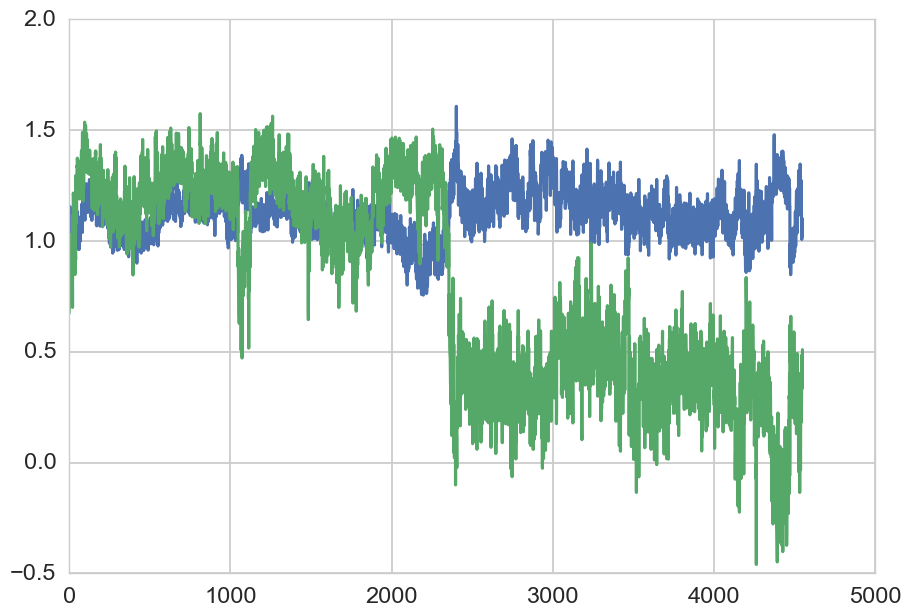

In [42]:
plot(prjh.tica_data["PROJ9152_9_12.jl"][:,:2])

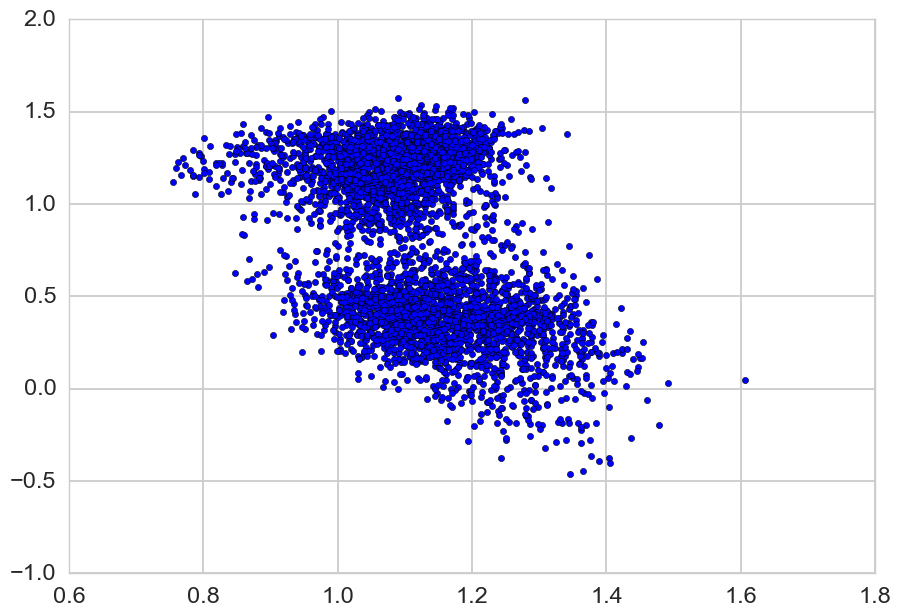

In [95]:
scatter(prjh.tica_data["PROJ9152_9_12.jl"][:,0],prjh.tica_data["PROJ9152_9_12.jl"][:,1])

PROJ9152_4_5.jl 2.02820180981
PROJ9152_10_2.jl 2.0200876811
PROJ9152_10_4.jl 2.02145771115
PROJ9152_8_7.jl 1.03907174286


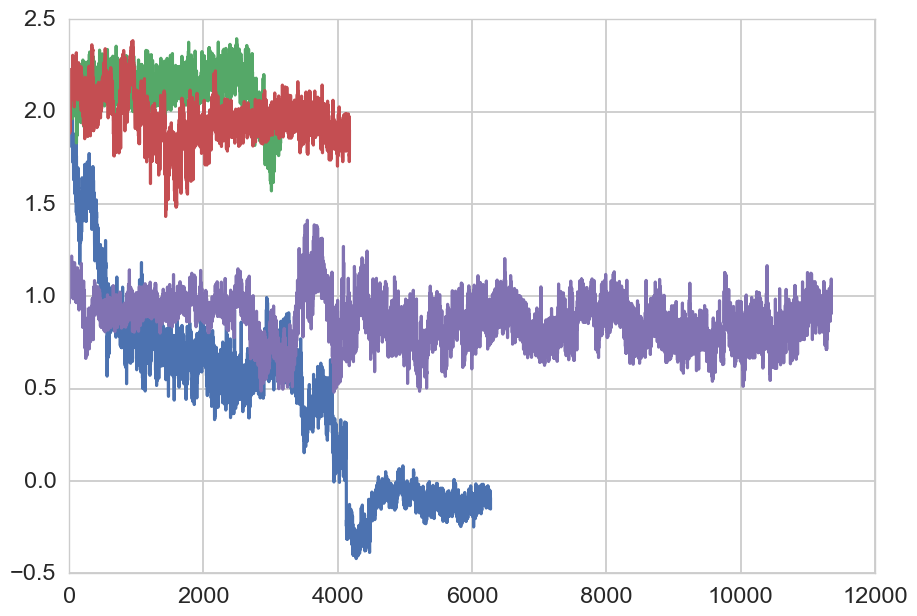

In [43]:
for i in max_movement(prjh.tica_data,1,4):
    print(i,prjh.tica_data[i][0,0])
    plot(prjh.tica_data[i][:,0])

In [44]:
# plot known 

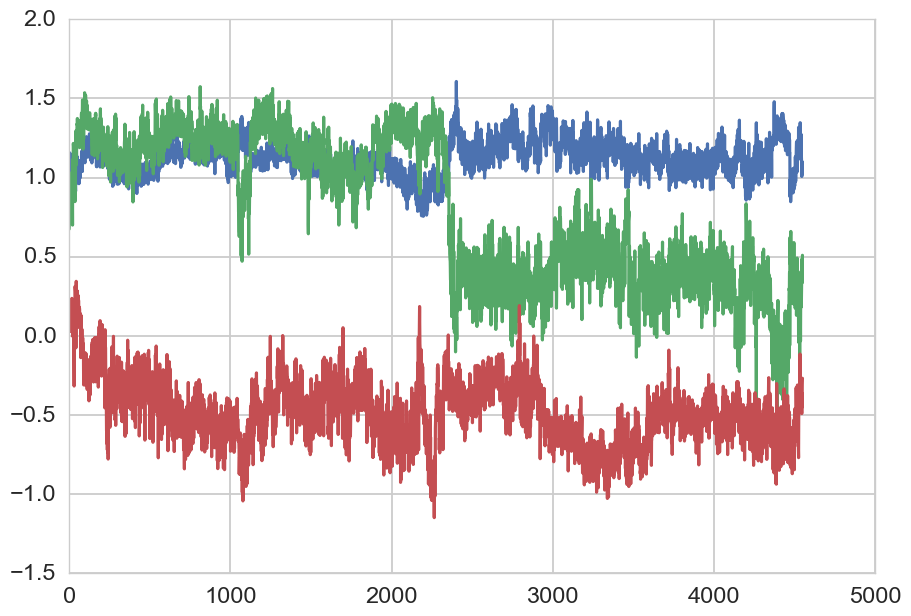

In [45]:
plot(prjh.tica_data["PROJ9152_9_12.jl"][:,:3])

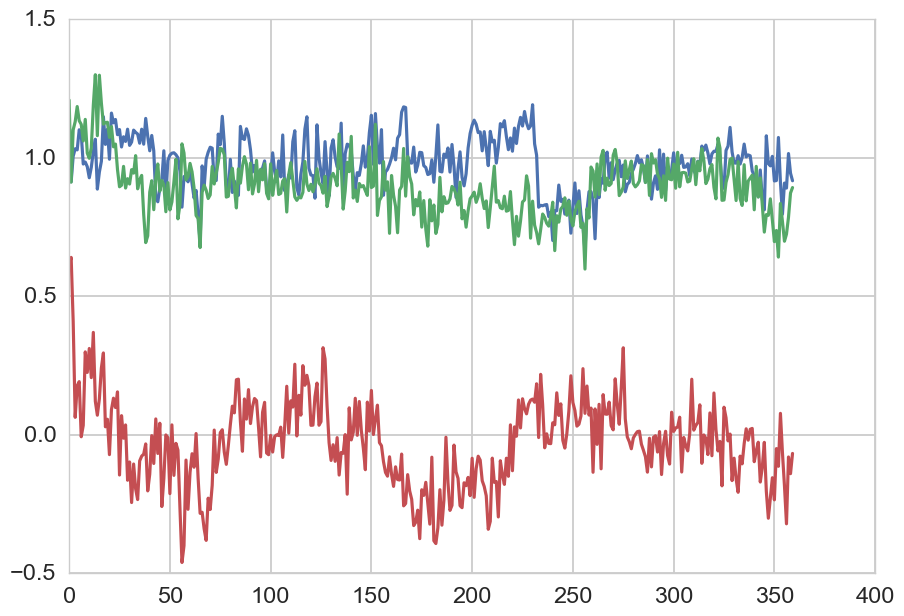

In [46]:
plot(prj.tica_data["PROJ9151_7_15.jl"][::20,:3])

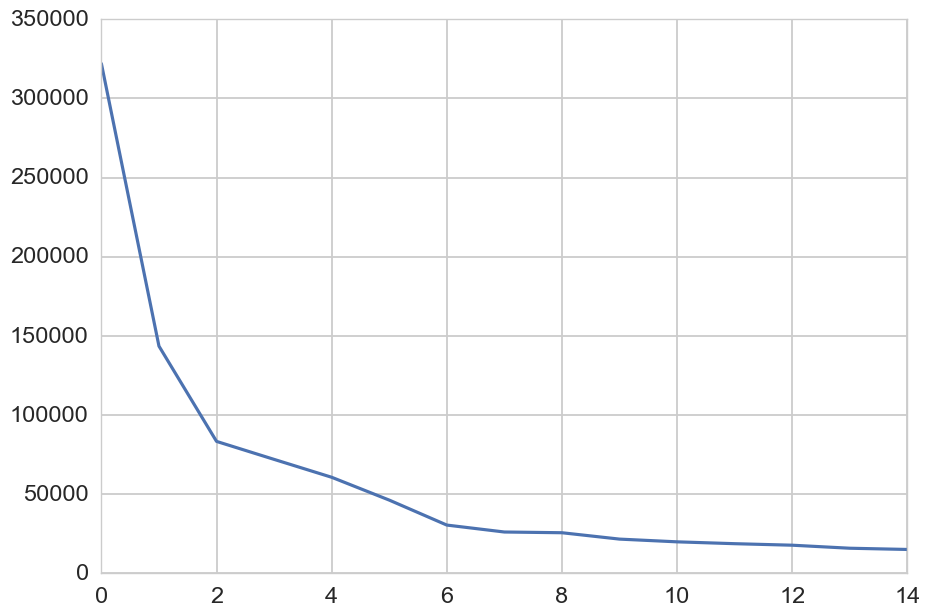

In [47]:
plot(prj.tica_mdl.timescales_)

In [48]:
print(len(np.nonzero(prj.tica_mdl.components_[0,])[0])/prj.tica_mdl.n_features)

0.12950971322849214


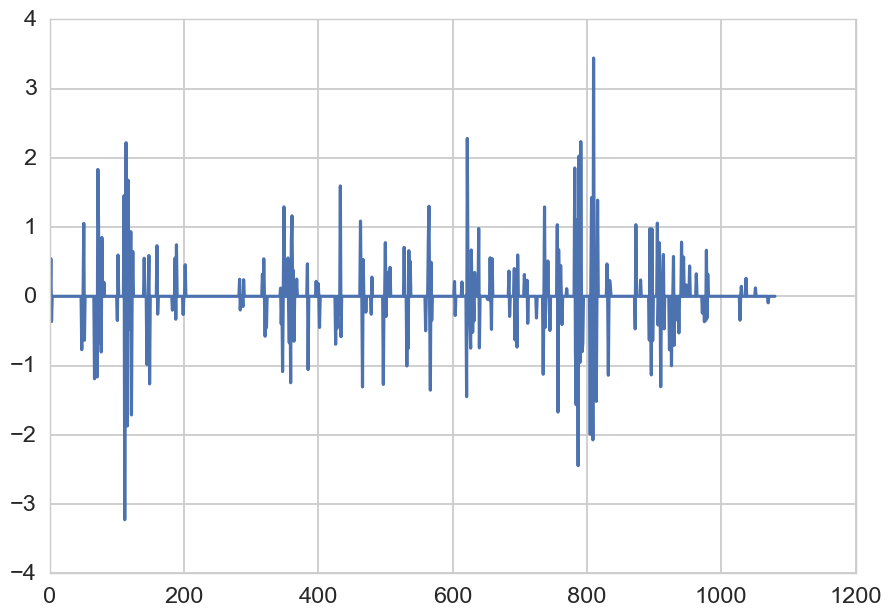

In [49]:
plot(prj.tica_mdl.components_[1,])

In [52]:
for tic_index in range(5):
    print(len(np.nonzero(prj.tica_mdl.components_[tic_index,])[0]))

140
195
265
303
656


In [78]:
import pandas as pd

In [56]:
t  = md.load("../models/btk_pdb/active.pdb")

In [58]:
f = load("../models/sparse_contact_mdl//featurizer.pkl")

In [77]:
btk_feat = load("../models/btk_data/btk_featurizer.pkl")
btk_df = load("../models/btk_data/btk_feature_descriptor.pkl")

In [79]:
abl_feat = load("../models/abl_data/abl_featurizer.pkl")
abl_df = load("../models/abl_data/abl_feature_descriptor.pkl")

In [60]:
df = pd.DataFrame(f.describe_features(t))

In [80]:
assert len(btk_df)==len(abl_df)

In [81]:
btk_df.head()

,atominds,featuregroup,featurizer,otherinfo,resids,resnames,resseqs
0,"[[20, 22, 24, 27, 28, 30, 32, 33, 35, 37, 39, ...",closest-heavy,Contact,10,"[2, 3]","[TRP, GLU]","[3, 4]"
1,"[[20, 22, 24, 27, 28, 30, 32, 33, 35, 37, 39, ...",closest-heavy,Contact,10,"[2, 4]","[TRP, ILE]","[3, 5]"
2,"[[20, 22, 24, 27, 28, 30, 32, 33, 35, 37, 39, ...",closest-heavy,Contact,10,"[2, 17]","[TRP, THR]","[3, 18]"
3,"[[20, 22, 24, 27, 28, 30, 32, 33, 35, 37, 39, ...",closest-heavy,Contact,10,"[2, 18]","[TRP, GLY]","[3, 19]"
4,"[[20, 22, 24, 27, 28, 30, 32, 33, 35, 37, 39, ...",closest-heavy,Contact,10,"[2, 19]","[TRP, GLN]","[3, 20]"


In [82]:
abl_df.head()

,atominds,featuregroup,featurizer,otherinfo,resids,resnames,resseqs
0,"[[24, 26, 28, 31, 32, 34, 36, 37, 39, 41, 43, ...",closest-heavy,Contact,10,"[1, 2]","[TRP, GLU]","[2, 3]"
1,"[[24, 26, 28, 31, 32, 34, 36, 37, 39, 41, 43, ...",closest-heavy,Contact,10,"[1, 3]","[TRP, MET]","[2, 4]"
2,"[[24, 26, 28, 31, 32, 34, 36, 37, 39, 41, 43, ...",closest-heavy,Contact,10,"[1, 16]","[TRP, GLY]","[2, 17]"
3,"[[24, 26, 28, 31, 32, 34, 36, 37, 39, 41, 43, ...",closest-heavy,Contact,10,"[1, 17]","[TRP, GLY]","[2, 18]"
4,"[[24, 26, 28, 31, 32, 34, 36, 37, 39, 41, 43, ...",closest-heavy,Contact,10,"[1, 18]","[TRP, GLN]","[2, 19]"


In [61]:
tica_feat = prj.tica_mdl.transform(f.transform([t]))

In [62]:
len(np.nonzero(prj.tica_mdl.components_[0,])[0])

140

In [71]:
df.head()

,atominds,featuregroup,featurizer,otherinfo,resids,resnames,resseqs
0,"[[20, 22, 24, 27, 28, 30, 32, 33, 35, 37, 39, ...",closest-heavy,Contact,10,"[2, 3]","[TRP, GLU]","[3, 4]"
1,"[[20, 22, 24, 27, 28, 30, 32, 33, 35, 37, 39, ...",closest-heavy,Contact,10,"[2, 4]","[TRP, ILE]","[3, 5]"
2,"[[20, 22, 24, 27, 28, 30, 32, 33, 35, 37, 39, ...",closest-heavy,Contact,10,"[2, 17]","[TRP, THR]","[3, 18]"
3,"[[20, 22, 24, 27, 28, 30, 32, 33, 35, 37, 39, ...",closest-heavy,Contact,10,"[2, 18]","[TRP, GLY]","[3, 19]"
4,"[[20, 22, 24, 27, 28, 30, 32, 33, 35, 37, 39, ...",closest-heavy,Contact,10,"[2, 19]","[TRP, GLN]","[3, 20]"


In [66]:
abl_traj = md.load("../models/abl_pdb/active.pdb").remove_solvent()

In [67]:
abl_list = [1,2,3,np.arange(146,166),np.arange(47,58),37,np.arange(16,22),87,84,148,127,56,67,127,128,129]

In [72]:
import itertools
abl_res =[]
for item in abl_list:
    if type(item)==int:
        abl_res.append(item)
    else:
        for j in item:
            abl_res.append(j)
abl_res = np.unique(abl_res)
abl_cnts = [i for i in itertools.combinations(abl_res,2)]

In [83]:
btk_df.iloc[np.nonzero(prj.tica_mdl.components_[0,])[0]].head(4)

,atominds,featuregroup,featurizer,otherinfo,resids,resnames,resseqs
31,"[[20, 22, 24, 27, 28, 30, 32, 33, 35, 37, 39, ...",closest-heavy,Contact,10,"[2, 150]","[TRP, SER]","[3, 151]"
35,"[[20, 22, 24, 27, 28, 30, 32, 33, 35, 37, 39, ...",closest-heavy,Contact,10,"[2, 154]","[TRP, LEU]","[3, 155]"
51,"[[44, 46, 48, 51, 54, 55, 56, 57, 58], [331, 3...",closest-heavy,Contact,10,"[3, 21]","[GLU, GLY]","[4, 22]"
53,"[[44, 46, 48, 51, 54, 55, 56, 57, 58], [592, 5...",closest-heavy,Contact,10,"[3, 37]","[GLU, LYS]","[4, 38]"


In [84]:
abl_df.iloc[np.nonzero(prj.tica_mdl.components_[0,])[0]].head(4)

,atominds,featuregroup,featurizer,otherinfo,resids,resnames,resseqs
31,"[[24, 26, 28, 31, 32, 34, 36, 37, 39, 41, 43, ...",closest-heavy,Contact,10,"[1, 151]","[TRP, SER]","[2, 152]"
35,"[[24, 26, 28, 31, 32, 34, 36, 37, 39, 41, 43, ...",closest-heavy,Contact,10,"[1, 155]","[TRP, THR]","[2, 156]"
51,"[[48, 50, 52, 55, 58, 59, 60, 61, 62], [334, 3...",closest-heavy,Contact,10,"[2, 20]","[GLU, GLY]","[3, 21]"
53,"[[48, 50, 52, 55, 58, 59, 60, 61, 62], [606, 6...",closest-heavy,Contact,10,"[2, 37]","[GLU, LYS]","[3, 38]"


In [76]:
len(abl_df),len(df)

(1081, 1081)

In [25]:
prj.tica_mdl.transform(f.transform([t]))

[array([[ 1.00861683, -0.37425891,  1.7492564 ]])]

In [161]:
prj.tica_mdl.transform(abl_feat.transform([abl_traj]))

[array([[ 1.4455396 ,  1.20973122, -1.80300906]])]

In [ ]:
Abl kinase

WEI motif 1 2 3

DFG 147 to 149

DFG +20: 147 to 166

Chelix Glu: 52

Chelix Glu +-5 = 47 to 57 

Lys 37

Ploop 16 to 21

Hinge  87 84

R-spine  148 127 56 67 

HRD 127 to 129